In [ ]:
# number of shared markers across species

In [2]:
library(dplyr)
library(ggplot2)

In [3]:
# cell types
ctypes = c('LV_vCM', 'RV_vCM', 'aCM', 'immature_CM', 'endocardial', 'epicardial',
                'mes_progenitor', 'fibroblast', 'SMC', 'neural_crest', 'blood', 'macrophage')

In [34]:
# get orthologs
om = read.delim('turtle/turtle_chicken_orthologs_biomart.txt', sep = '\t')
om <- om[which(om[,1]!='' & om[,2]!='' & !is.na(om[,5]) & om[,5]==1 & om[,4]=='ortholog_one2one'),]

# om = read.delim('lizard/lizard_turtle_orthologs_eggNOG.txt', sep = '\t')
# om <- om[which(!is.na(om$lizard_gene) & !is.na(om$ortholog_name)),]
# om <- om[,c('lizard_gene', 'ortholog_name')]
dim(om)
om[1,]

[1] 11275     5

Gene.name Chicken.gene.name Last.common.ancestor.with.Chicken
10 ND2       ND2               Archelosauria                    
   Chicken.homology.type Chicken.orthology.confidence..0.low..1.high.
10 ortholog_one2one      1

In [35]:
tab1 = read.delim('chicken/chicken_celltype_markers.csv', sep = ',')
tab2 = read.delim('turtle/turtle_celltype_markers.csv', sep = ',')

In [36]:
newdf = data.frame(celltype = ctypes, total = NA, shared = NA, different = NA)

for(ii in 1:length(ctypes)){
    ctype = ctypes[ii]
    g1 = tab1$gene[tab1$cluster==ctype]
    g2 = tab2$gene[tab2$cluster==ctype]
    
    # g1 <- om$lizard_gene[match(g1, om$ortholog_name)]
    g1 <- om[match(g1, om[,2]),1]
    g1 <- g1[!is.na(g1)]

    common_genes = intersect(g1, g2)
    all_genes = union(g1, g2)
    diff_genes = setdiff(all_genes, common_genes)

    newdf$total[ii] = length(all_genes)
    newdf$shared[ii] = length(common_genes)
    newdf$different[ii] = length(diff_genes)
}

newdf$prop_shared = newdf$shared/newdf$total
newdf[1:2,]

celltype total shared different prop_shared
1 LV_vCM   5712  829    4883      0.1451331  
2 RV_vCM   6177  857    5320      0.1387405

In [37]:
newdf

celltype       total shared different prop_shared
1  LV_vCM         5712   829   4883      0.1451331  
2  RV_vCM         6177   857   5320      0.1387405  
3  aCM            6543   879   5664      0.1343420  
4  immature_CM    5210   921   4289      0.1767754  
5  endocardial    8630  2037   6593      0.2360371  
6  epicardial     9302  2206   7096      0.2371533  
7  mes_progenitor 8620  2136   6484      0.2477958  
8  fibroblast     8318  2128   6190      0.2558307  
9  SMC            5833  1314   4519      0.2252700  
10 neural_crest   3186   527   2659      0.1654112  
11 blood          5219   885   4334      0.1695727  
12 macrophage     3781   490   3291      0.1295953

In [13]:
t1 = read.delim('cardoso_moreira_S2_expressolog.txt', sep ='\t')
t1[1,]

Human.ID        Gene.symbol WGNA.module Disease Number.systems System
1 ENSG00000000003 TSPAN6      M23         Not_DM  NA             NA    
  Number.of.organs.with.dynamic.expression Organ.specificity
1 4                                        0.08661762       
  Organ.of..maximum.expression Brain.time.specificity ⋯ WGCNA.module.color
1 Kidney                       0.4578233              ⋯ royalblue         
  chicken_gene turtle_gene lizard_gene turtle_lizard chicken_lizard
1 TSPAN6       TSPAN6      TSPAN6      0.7796995     0.9053606     
  chicken_turtle avg_expressolog Disease2    Organ2
1 0.9245937      0.8698846       Non_disease Other

In [39]:
newdf2 = c()

for(ii in 1:length(ctypes)){
    ctype = ctypes[ii]
    g1 = tab1$gene[tab1$cluster==ctype]
    g2 = tab2$gene[tab2$cluster==ctype]
    
    # g1 <- om$lizard_gene[match(g1, om$ortholog_name)]
    g1 <- om[match(g1, om[,2]),1]
    g1 <- g1[!is.na(g1)]

    common_genes = intersect(g1, g2)
    all_genes = union(g1, g2)
    diff_genes = setdiff(all_genes, common_genes)

    temp1 = data.frame(celltype = ctype, gtype = 'common', 
                       score = t1$avg_expressolog[match(common_genes, t1$turtle_gene)])
    temp2 = data.frame(celltype = ctype, gtype = 'different', 
                       score = t1$avg_expressolog[match(diff_genes, t1$turtle_gene)])
    newdf2 = rbind(newdf2, temp1, temp2)
}

newdf2[1:2,]

celltype gtype  score    
1 LV_vCM   common 0.8758450
2 LV_vCM   common 0.9161751

In [40]:
newdf2$celltype = factor(newdf2$celltype, levels = ctypes)

Warning message:
“Removed 22906 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


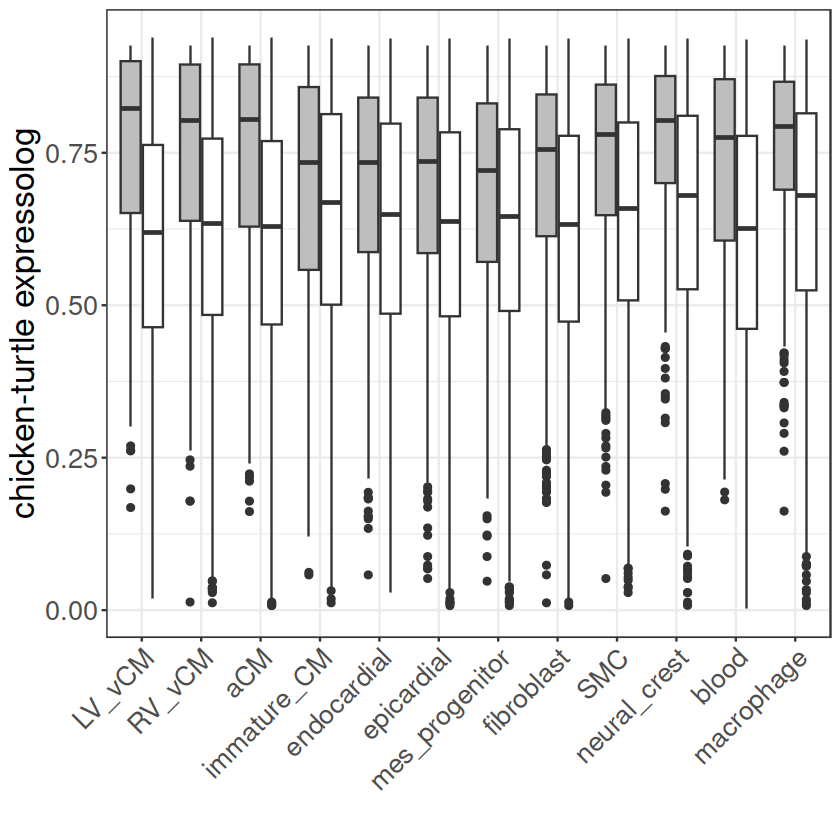

In [41]:
ggplot(newdf2, aes(x = celltype, y = score, fill = gtype)) + geom_boxplot() +
theme_bw() + scale_fill_manual(values = c('#bebebe', 'white')) + theme(legend.position = 'none') +
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) +
xlab('') + ylab('chicken-turtle expressolog')

In [8]:
tab3 = read.delim('chicken/chicken_stage_markers.csv', sep = ',')
tab4 = read.delim('lizard/lizard_stage_markers.csv', sep = ',')

# tab3 = read.delim('chicken/chicken_stage_tau.csv', sep = ',')
# tab4 = read.delim('lizard/lizard_stage_tau.csv', sep = ',')
# tab3 <- tab3[tab3$stage_tau>0.7 & tab3$mean_exp>5,]
# tab4 <- tab4[tab4$stage_tau>0.7 & tab4$mean_exp>5,]

In [33]:
sum(!is.na(match(diff_genes, tab4$gene)))
sum(!is.na(match(common_genes, tab4$gene)))

[1] 3514

[1] 681

In [5]:
jin = read.delim('disease/human_CHD_case_genes_summary.csv', sep = ',')
dim(jin)
jin[1:2,]

[1] 8687   21

Gene    LoF DMis LVO HTX AVC CTD CTD_TGA other none ⋯ extracardiac neuro pLI 
1 MARCH9  1   0    0   0   0   0   0       1     0    ⋯ 0            1.0   0.35
2 MARCH10 5   0    1   0   0   0   0       4     0    ⋯ 0.6          0.6   0.00
  mouse_exp_rank known_CHD CHD_DEG Disease CM_DEG TF chromatin_modifier
1 36.2           0         0       NA      0      0  0                 
2 23.4           0         0       NA      0      0  0

In [6]:
tab1 = read.delim('chicken/chicken_celltype_markers.csv', sep = ',')
tab3 = read.delim('chicken/chicken_stage_markers.csv', sep = ',')
tab1[1,]
tab3[1,]

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster     gene   
1 0     5.290605   0.874 0.106 0         endocardial RAPGEF5

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene 
1 0     0.8361322  0.758 0.518 0         stage23 ACTC1

In [11]:
# load list of orthologs
om = read.delim('chicken/human_chicken_orthologs_biomart.txt', sep = '\t')
colnames(om) <- c('human', 'chicken', 'LCA', 'homology_type')
om <- om[om[,1]!='' & om[,2]!='' & om$homology_type=='ortholog_one2one',]
dim(om)
om[1,]

jin$chicken_gene = om[match(jin$Gene, om[,1]),2]

[1] 12494     4

human  chicken LCA     homology_type   
6 MT-ND1 ND1     Amniota ortholog_one2one

In [14]:
jin2 = jin
jin2 <- jin2[!is.na(jin2$chicken_gene),]
dim(jin2)

[1] 5649   22

In [16]:
ids = match(tab1$gene[tab1$cluster=='endocardial'], jin2$chicken_gene)
ids = ids[!is.na(ids)]
table(jin2$known_CHD[ids])


   0    1 59.4 86.7 
2018   59    1    1 

In [17]:
table(jin2$known_CHD)


   0    1 13.3   19   20 40.1 41.6 43.2 47.9 56.2 59.4 59.5 61.7 79.9 80.1 84.5 
5500  131    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
86.7 94.7 
   1    1 